In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

tx_data = pd.read_csv('onlineretail.csv', encoding = 'latin1')

tx_data[5:11]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom
10,536367,22745,POPPY'S PLAYHOUSE BEDROOM,6,12/1/2010 8:34,2.10,13047.0,United Kingdom


In [128]:
tx_data['InvoiceDate'] = pd.to_datetime(tx_data['InvoiceDate'])

tx_data['InvoiceYearMonth'] = tx_data['InvoiceDate'].map(lambda date: 100 * date.year + date.month)

tx_data['Revenue'] = tx_data['UnitPrice'] * tx_data['Quantity']

tx_revenue = tx_data.groupby(['InvoiceYearMonth'])['Revenue'].sum().reset_index()

tx_revenue = tx_revenue[:-1]

tx_revenue

,InvoiceYearMonth,Revenue
0,201012,748957.020
1,201101,560000.260
2,201102,498062.650
3,201103,683267.080
4,201104,493207.121
5,201105,723333.510
6,201106,691123.120
7,201107,681300.111
8,201108,682680.510
9,201109,1019687.622


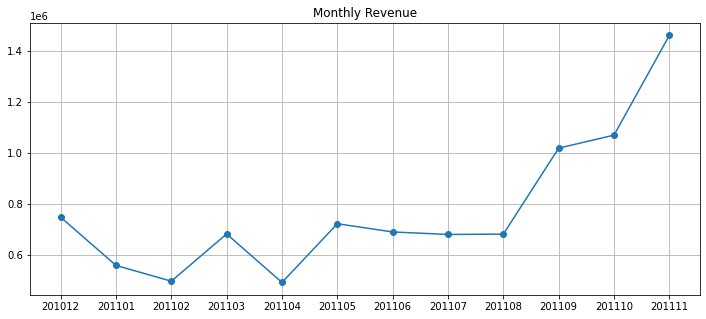

In [129]:
plt.figure(figsize = (12, 5))
#plt.ylim(0.4, 1.6)
plt.plot(tx_revenue['InvoiceYearMonth'].astype(str), tx_revenue['Revenue'], marker = 'o')
plt.title('Monthly Revenue')
plt.grid()
plt.show()

In [130]:
tx_revenue['MonthlyGrowth'] = tx_revenue['Revenue'].pct_change()

tx_revenue.iloc[4]['MonthlyGrowth']


-0.278163495012814

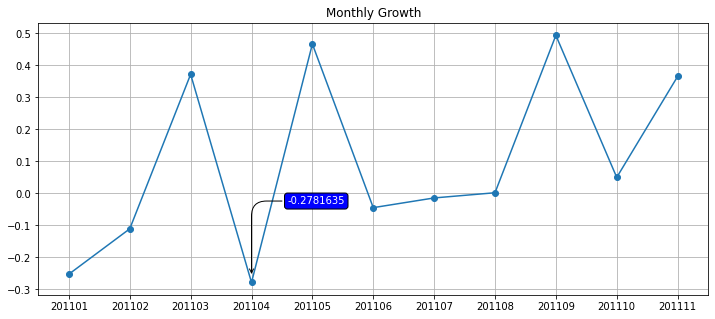

In [131]:
# annotation x & y
ydata = tx_revenue.iloc[4]['MonthlyGrowth']

# annotation parameters setting
bbox = dict(boxstyle ="round", facecolor = 'blue')
arrowprops = dict(
    arrowstyle = "->",
    connectionstyle = "angle, angleA = 0, angleB = 90,\
    rad = 15")


plt.figure(figsize = (12, 5))
plt.plot(tx_revenue['InvoiceYearMonth'].astype(str), tx_revenue['MonthlyGrowth'], marker = 'o')
# Set annotation
plt.annotate('%2.7f'%(ydata),
            (4, ydata+0.02),  xytext =(0.5 * 72, 72),
            textcoords ='offset points',     
            color = 'white',
            bbox = bbox, arrowprops = arrowprops)
plt.title('Monthly Growth')
plt.grid()
plt.show()

In [132]:
tx_uk = tx_data.query("Country == 'United Kingdom'").reset_index(drop=True)

tx_monthly_active = tx_uk.groupby(['InvoiceYearMonth'])['CustomerID'].nunique().reset_index()



In [133]:
Mar = tx_monthly_active.iloc[3]['CustomerID']
Apr = tx_monthly_active.iloc[4]['CustomerID']
Decline = ((Mar - Apr) / Mar) * 100

print("Monthly avtive customers declined  %{:.2f} from Mar to Apr".format(Decline))



Monthly avtive customers declined  %11.48 from Mar to Apr


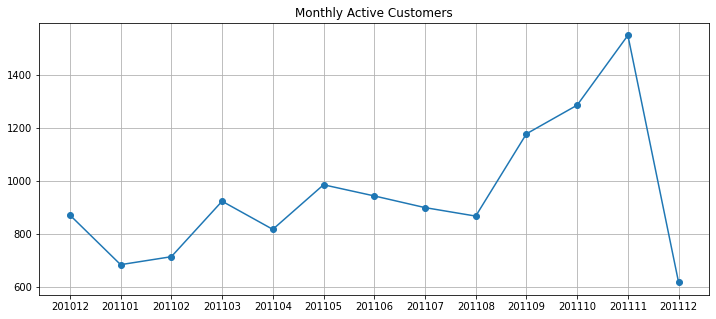

In [134]:
plt.figure(figsize = (12, 5))
plt.plot(tx_monthly_active['InvoiceYearMonth'].astype(str), tx_monthly_active['CustomerID'], marker = 'o')
plt.title('Monthly Active Customers')
plt.grid()
plt.show()

In [135]:
tx_monthly_sales = tx_uk.groupby(['InvoiceYearMonth'])['Quantity'].sum().reset_index()

tx_monthly_sales['Quantity'].iloc[4]

257666

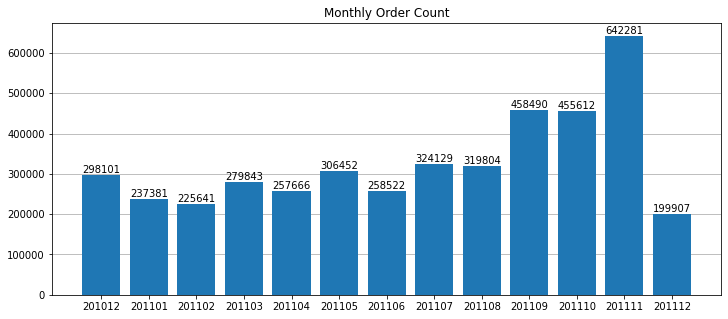

In [136]:
from matplotlib.pyplot import bar_label

x_sales = tx_monthly_sales['InvoiceYearMonth'].astype(str)
y_sales = tx_monthly_sales['Quantity']
plt.figure(figsize = (12, 5))
p = plt.bar(x_sales, y_sales, bottom=None, align='center', data=None, zorder = 3 )
plt.bar_label(p)
plt.grid(axis = 'y')
plt.title("Monthly Order Count")
plt.show()

In [137]:
tx_monthly_order_avg = tx_uk.groupby(['InvoiceYearMonth'])['Revenue'].mean().reset_index()

tx_monthly_order_avg.iloc[0]['Revenue']


16.86585968847352

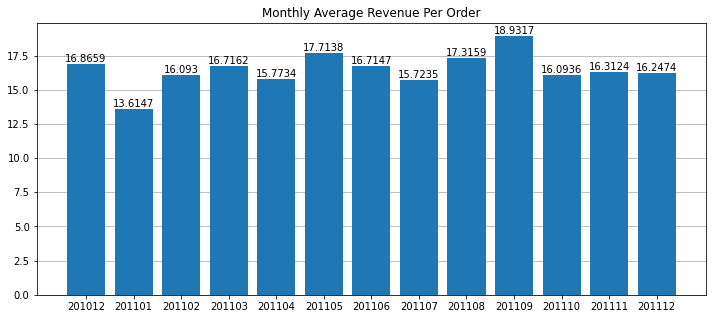

In [138]:
x_avg = tx_monthly_order_avg['InvoiceYearMonth'].astype(str)
y_avg = tx_monthly_order_avg['Revenue']

plt.figure(figsize = (12, 5))
p = plt.bar(x_avg, y_avg, bottom=None, align='center', data=None, zorder = 3 )
plt.bar_label(p)
plt.grid(axis = 'y')
plt.title("Monthly Average Revenue Per Order")
plt.show()

In [139]:

tx_min_purchase = tx_uk.groupby('CustomerID').InvoiceDate.min().reset_index()
tx_min_purchase.columns = ['CustomerID', 'MinPurchaseDate']
tx_min_purchase['MinPurchaseYearMonth'] = tx_min_purchase['MinPurchaseDate'].map(lambda date: 100 * date.year + date.month)


tx_uk = pd.merge(tx_uk, tx_min_purchase, on = 'CustomerID')

tx_uk.head(3)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYearMonth,Revenue,MinPurchaseDate,MinPurchaseYearMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,201012,15.30,2010-12-01 08:26:00,201012
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,2010-12-01 08:26:00,201012
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,201012,22.00,2010-12-01 08:26:00,201012


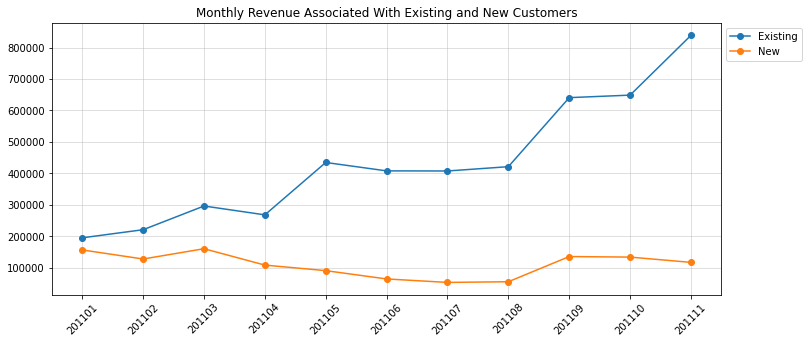

In [140]:

tx_uk['UserType'] = 'New'

#if cond is True replace the cell value of 'UserType' column with "Existing"
tx_uk.loc[tx_uk['InvoiceYearMonth'] > tx_uk['MinPurchaseYearMonth'], 'UserType'] = 'Existing'

tx_user_type_revenue = tx_uk.groupby(['InvoiceYearMonth', 'UserType'])['Revenue'].sum().reset_index()

# filtering the dates
tx_user_type_revenue = tx_user_type_revenue.query("InvoiceYearMonth != 201012 and InvoiceYearMonth != 201112")

# Plotting

x_Existing = tx_user_type_revenue.query("UserType == 'Existing'")['InvoiceYearMonth'].astype(str)
y_Existing = tx_user_type_revenue.query("UserType == 'Existing'")['Revenue']

x_New = tx_user_type_revenue.query("UserType == 'New'")['InvoiceYearMonth'].astype(str)
y_New = tx_user_type_revenue.query("UserType == 'New'")['Revenue']

plt.figure(figsize = (12 ,5))

plt.plot(x_Existing, y_Existing, marker = 'o', label = 'Existing')
plt.plot(x_New, y_New, marker = 'o', label = 'New')
plt.legend(loc = 'best',  bbox_to_anchor=(1,1))
plt.xticks(rotation = 45)
plt.title("Monthly Revenue Associated With Existing and New Customers")
plt.grid(alpha=0.5)

plt.show()

In [141]:
#create a dataframe that shows new user ratio - we also need to drop NA values (first month new user ratio is 0)
tx_user_ratio = tx_uk.query("UserType == 'New'").groupby(['InvoiceYearMonth'])['CustomerID'].nunique()/tx_uk.query("UserType == 'Existing'").groupby(['InvoiceYearMonth'])['CustomerID'].nunique() 
tx_user_ratio = tx_user_ratio.reset_index()

# drop Nan values(1st month user ratio is 0)
tx_user_ratio = tx_user_ratio.dropna()

#printing the dafaframe
tx_user_ratio.head(12)

,InvoiceYearMonth,CustomerID
1,201101,1.124224
2,201102,0.904000
3,201103,0.792233
4,201104,0.510166
5,201105,0.343793
6,201106,0.281250
7,201107,0.236589
8,201108,0.192572
9,201109,0.304878
10,201110,0.328852


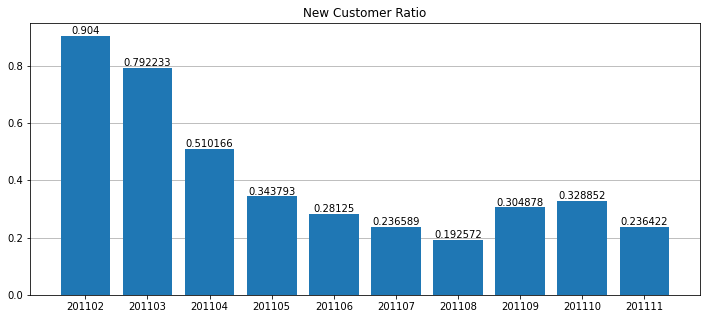

In [142]:
x = tx_user_ratio.query("InvoiceYearMonth>201101 and InvoiceYearMonth<201112")['InvoiceYearMonth'].astype(str)
y = tx_user_ratio.query("InvoiceYearMonth>201101 and InvoiceYearMonth<201112")['CustomerID']

plt.figure(figsize = (12, 5))
p = plt.bar(x, y, bottom=None, align='center', data=None, zorder = 3 )
plt.bar_label(p)
plt.grid(axis = 'y')
plt.title("New Customer Ratio")
plt.show()


In [143]:
#identify which users are active by looking at their revenue per month
tx_user_purchase = tx_uk.groupby(['CustomerID','InvoiceYearMonth'])['Revenue'].sum().reset_index()
tx_user_purchase.head(3)


,CustomerID,InvoiceYearMonth,Revenue
0,12346.0,201101,0.00
1,12747.0,201012,706.27
2,12747.0,201101,303.04


In [144]:
#create retention matrix with crosstab
tx_retention = pd.crosstab(tx_user_purchase['CustomerID'], tx_user_purchase['InvoiceYearMonth']).reset_index()

print(tx_retention.shape)
tx_retention.head(2)

(3950, 14)


InvoiceYearMonth,CustomerID,201012,201101,201102,201103,201104,201105,201106,201107,201108,201109,201110,201111,201112
0,12346.0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,12747.0,1,1,0,1,0,1,1,0,1,0,1,1,1


In [145]:
#create an array of dictionary which keeps Retained & Total User count for each month
months = tx_retention.columns[2:]
months

retention_array = []
for i in range(len(months)-1):
    retention_data = {}
    selected_month = months[i+1]
    prev_month = months[i]
    retention_data['InvoiceYearMonth'] = int(selected_month)
    retention_data['TotalUserCount'] = tx_retention[selected_month].sum()
    retention_data['RetainedUserCount'] = tx_retention[(tx_retention[selected_month]>0) & (tx_retention[prev_month]>0)][selected_month].sum()
    retention_array.append(retention_data)

#print(retention_array)
#convert the array to dataframe and calculate Retention Rate
tx_retention = pd.DataFrame(retention_array)
tx_retention['RetentionRate'] = tx_retention['RetainedUserCount']/tx_retention['TotalUserCount']

In [146]:
tx_retention.tail(3)

,InvoiceYearMonth,TotalUserCount,RetainedUserCount,RetentionRate
8,201110,1285,502,0.390661
9,201111,1548,616,0.397933
10,201112,617,402,0.651540


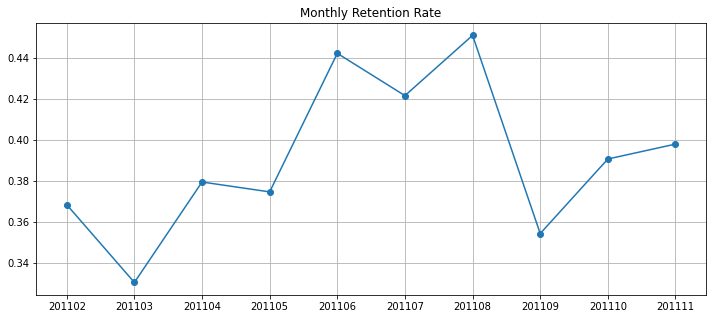

In [147]:
x=tx_retention.query("InvoiceYearMonth<201112")['InvoiceYearMonth'].astype(str)
y=tx_retention.query("InvoiceYearMonth<201112")['RetentionRate']

plt.figure(figsize = (12, 5))
plt.plot(x, y, marker = 'o')
plt.title('Monthly Retention Rate')
plt.grid()
plt.show()

In [98]:
#create our retention table again with crosstab() 
tx_retention = pd.crosstab(tx_user_purchase['CustomerID'], tx_user_purchase['InvoiceYearMonth']).reset_index()

#add MinPurchaseYearMonth column from tx_min_purchase
tx_retention = pd.merge(tx_retention,tx_min_purchase[['CustomerID','MinPurchaseYearMonth']],on='CustomerID')
new_column_names = [ 'm_' + str(column) for column in tx_retention.columns[:-1]]
new_column_names.append('MinPurchaseYearMonth')
tx_retention.columns = new_column_names

#create the array of Retained users for each cohort monthly
retention_array = []
for i in range(len(months)):
    retention_data = {}
    selected_month = months[i]
    prev_months = months[:i]
    next_months = months[i+1:]
    for prev_month in prev_months:
        retention_data[prev_month] = np.nan
        
    total_user_count = tx_retention[tx_retention.MinPurchaseYearMonth ==  selected_month].MinPurchaseYearMonth.count()
    retention_data['TotalUserCount'] = total_user_count
    retention_data[selected_month] = 1 
    
    query = "MinPurchaseYearMonth == {}".format(selected_month)
    

    for next_month in next_months:
        new_query = query + " and {} > 0".format(str('m_' + str(next_month)))
        retention_data[next_month] = np.round(tx_retention.query(new_query)['m_' + str(next_month)].sum()/total_user_count,2)
    retention_array.append(retention_data)
    
tx_retention = pd.DataFrame(retention_array)
tx_retention.index = months

#showing new cohort based retention table
tx_retention

,TotalUserCount,201101,201102,201103,201104,201105,201106,201107,201108,201109,201110,201111,201112
InvoiceYearMonth,,,,,,,,,,,,,
201101,362,1.0,0.23,0.28,0.25,0.34,0.29,0.26,0.26,0.31,0.35,0.36,0.15
201102,339,NaN,1.00,0.25,0.19,0.28,0.28,0.25,0.26,0.28,0.28,0.31,0.10
201103,408,NaN,NaN,1.00,0.19,0.26,0.22,0.23,0.17,0.26,0.24,0.29,0.09
201104,276,NaN,NaN,NaN,1.00,0.22,0.22,0.22,0.21,0.23,0.23,0.26,0.08
201105,252,NaN,NaN,NaN,NaN,1.00,0.23,0.17,0.17,0.21,0.24,0.27,0.10
201106,207,NaN,NaN,NaN,NaN,NaN,1.00,0.21,0.16,0.25,0.26,0.32,0.10
201107,172,NaN,NaN,NaN,NaN,NaN,NaN,1.00,0.20,0.19,0.23,0.28,0.11
201108,140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,0.26,0.23,0.26,0.14
201109,275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,0.29,0.33,0.12
